In [67]:
%matplotlib inline

In [68]:
import numpy as np
import pandas as pd
from pandas_datareader import data

In [69]:
df_russell = data.get_data_yahoo('^RUT')

In [70]:
df_russell.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-09-02,1146.030029,1128.050049,1128.050049,1146.030029,37426200,1146.030029
2015-09-03,1157.630005,1143.790039,1148.619995,1145.150024,35207000,1145.150024
2015-09-04,1142.550049,1130.750000,1132.949951,1136.170044,31670900,1136.170044
2015-09-08,1162.449951,1139.069946,1139.069946,1161.760010,35486500,1161.760010
2015-09-09,1170.199951,1147.329956,1162.719971,1148.229980,36521200,1148.229980


In [71]:
# get the number of training days
print(f"Training days = {df_russell.shape}")

Training days = (1258, 6)


In [72]:
# to visualize the close price data

C:\Users\UTENTE\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:245: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  base = dates.epoch2num(dt.asi8 / 1.0e9)


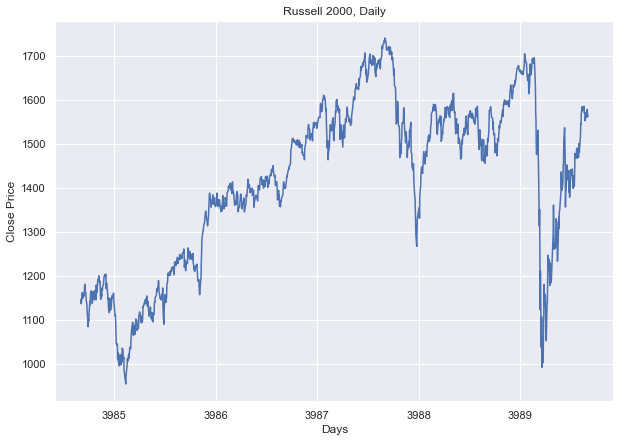

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.figure(figsize=(10, 7))
plt.title('Russell 2000, Daily')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df_russell['Close'])
plt.show()

In [74]:
# to get the close price:
df_russell = df_russell[['Close']]
df_russell.head()

,Close
Date,
2015-09-02,1146.030029
2015-09-03,1145.150024
2015-09-04,1136.170044
2015-09-08,1161.760010
2015-09-09,1148.229980


In [75]:
df_russell = df_russell.reset_index()
df_russell

,Date,Close
0,2015-09-02,1146.030029
1,2015-09-03,1145.150024
2,2015-09-04,1136.170044
3,2015-09-08,1161.760010
4,2015-09-09,1148.229980
...,...,...
1253,2020-08-25,1571.209961
1254,2020-08-26,1560.189941
1255,2020-08-27,1564.560059
1256,2020-08-28,1578.339966


In [76]:
df_russell.drop(['Date'], axis=1, inplace=True)
df_russell

,Close
0,1146.030029
1,1145.150024
2,1136.170044
3,1161.760010
4,1148.229980
...,...
1253,1571.209961
1254,1560.189941
1255,1564.560059
1256,1578.339966


In [77]:
# create a variable to predict 'X' days in the future
future_days = 30

In [78]:
# create a new target column shifted 'X' days/units up:
df_russell['Prediction'] = df_russell[['Close']].shift(-future_days)
df_russell.tail()

,Close,Prediction
1253,1571.209961,NaN
1254,1560.189941,NaN
1255,1564.560059,NaN
1256,1578.339966,NaN
1257,1561.875977,NaN


In [79]:
# Create a future dataset-X and convert a numpy array and remove last 'x' rows/units
x = np.array(df_russell.drop(['Prediction'],axis=1))[:-future_days]
print(x)

[[1146.0300293 ]
 [1145.15002441]
 [1136.17004395]
 ...
 [1467.56005859]
 [1473.31994629]
 [1467.94995117]]


In [80]:
# to create a target dataset(y) and convert it to a numpy array and get all of the target values except the last 'x' rows days
y = np.array(df_russell['Prediction'])[:-future_days]
print(y)

[1162.77001953 1162.31005859 1164.30004883 ... 1564.56005859 1578.33996582
 1561.87597656]


In [81]:
# split the data into 75% training and 25% testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25)

In [82]:
# creating Models
# creating the decision tree regressior model
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [83]:
# creating the Linear Regression model
from sklearn.linear_model import LinearRegression
linear = LinearRegression().fit(x_train, y_train)

In [84]:
# to get the last 'x' rows/days of the feature dataset:
x_future = df_russell.drop(['Prediction'], axis=1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[1536.89001465],
       [1507.05004883],
       [1467.39001465],
       [1356.2199707 ],
       [1387.68005371],
       [1419.60998535],
       [1452.26000977],
       [1426.5300293 ],
       [1427.32995605],
       [1418.63000488],
       [1433.5300293 ],
       [1439.33996582],
       [1389.73999023],
       [1413.31005859],
       [1378.7800293 ],
       [1421.20996094],
       [1441.36999512],
       [1427.31005859],
       [1431.85998535],
       [1442.88000488],
       [1416.        ],
       [1427.40002441],
       [1398.92004395],
       [1422.68005371],
       [1403.56994629],
       [1428.26000977],
       [1478.27001953],
       [1467.56005859],
       [1473.31994629],
       [1467.94995117]])

In [85]:
# to see the model tree prediction
tree_predicition = tree.predict(x_future)
print(f"Decision Tree prediction = {tree_predicition}")

Decision Tree prediction = [1487.51000977 1490.14001465 1490.19995117 1467.55004883 1484.65002441
 1469.76000977 1467.56005859 1575.55004883 1480.43005371 1506.80004883
 1517.20996094 1546.23999023 1544.61999512 1569.18005371 1584.67004395
 1438.05004883 1490.90002441 1480.43005371 1577.88000488 1464.41003418
 1357.79003906 1572.06994629 1564.30004883 1552.47998047 1568.4699707
 1571.20996094 1560.18994141 1564.56005859 1578.33996582 1561.87597656]


In [86]:
# to see the model linear regression prediciton
linear_prediction = linear.predict(x_future)
print(f"Linear regression Prediction = {linear_prediction}")

Linear regression Prediction = [1520.7830096  1497.01504696 1465.4252584  1376.87671691 1401.93512623
 1427.36777676 1453.37399155 1432.87969145 1433.51684464 1426.5872082
 1438.45529229 1443.08299043 1403.57589535 1422.34979434 1394.84612858
 1428.64218036 1444.69993801 1433.50099602 1437.12507823 1445.90268254
 1424.49237142 1433.57265509 1410.88794038 1429.81313043 1414.59165458
 1434.25764581 1474.09133902 1465.56070085 1470.14853438 1465.87125591]


C:\Users\UTENTE\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


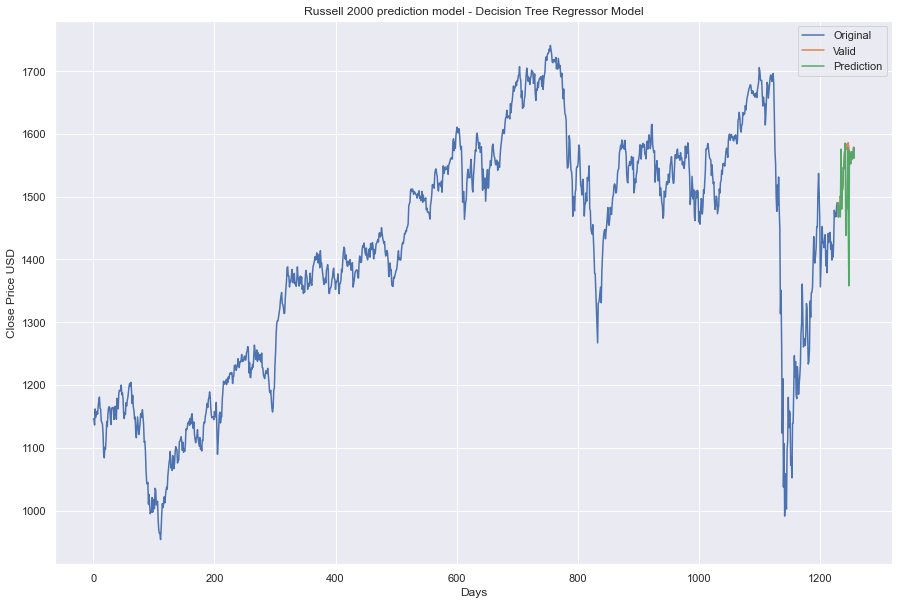

In [87]:
# visualize decision tree predictions
predictions = tree_predicition
valid = df_russell[x.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(15,10))

plt.title('Russell 2000 prediction model - Decision Tree Regressor Model')
plt.xlabel('Days')
plt.ylabel('Close Price USD')

plt.plot(df_russell['Close'])
plt.plot(valid[['Close', 'Prediction']])

plt.legend(['Original', 'Valid', 'Prediction'])
plt.show()

C:\Users\UTENTE\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


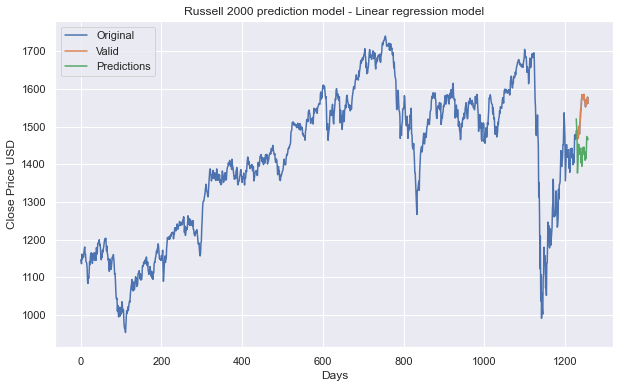

In [88]:
# visualize the linear model predictions
predictions = linear_prediction
valid = df_russell[x.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(10,6))
plt.title("Russell 2000 prediction model - Linear regression model")
plt.xlabel('Days')
plt.ylabel('Close Price USD')
plt.plot(df_russell['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Predictions'])

plt.show()